In [1]:
import sys; sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/AnalysisTreesInformation/AnaTreesPackage/notebooks/')
from notebooks_tools import * 
import ROOT , rootpy
from root_numpy import hist2array , tree2array
from matplotlib.ticker import NullFormatter
%matplotlib inline

/usr/local/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
histograms_file = ROOT.TFile('/Users/erezcohen/Desktop/uBoone/analysis/BurstNoiseCheckEvents/run9778_subrun_1_2_events_8_9_23_32.root')

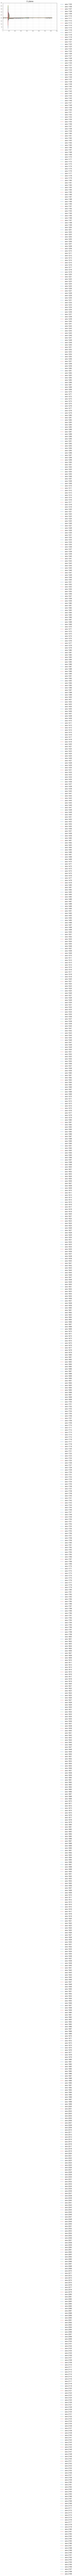

In [26]:
event=9
t_min , t_max = 0 , 8200
title = 'event %d wave-forms'%event
title = 'U plane'
fig,ax=plt.subplots(figsize=(12,6))
for wire in np.arange(1105,2200,1):
    h = histograms_file.Get("h_wf_evnt%d_wire%d"%(event , wire))
    histo=hist2array(h)
    plt.plot(np.arange(t_min , t_max,1), histo[t_min:t_max],label='wire %d'%wire)
# set_axes(ax,x_label='time tick',y_label='ADC',fontsize=20)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=20)
ax.grid('--',alpha=0.75)
ax.set_title(title,y=1.02,fontsize=25)

7


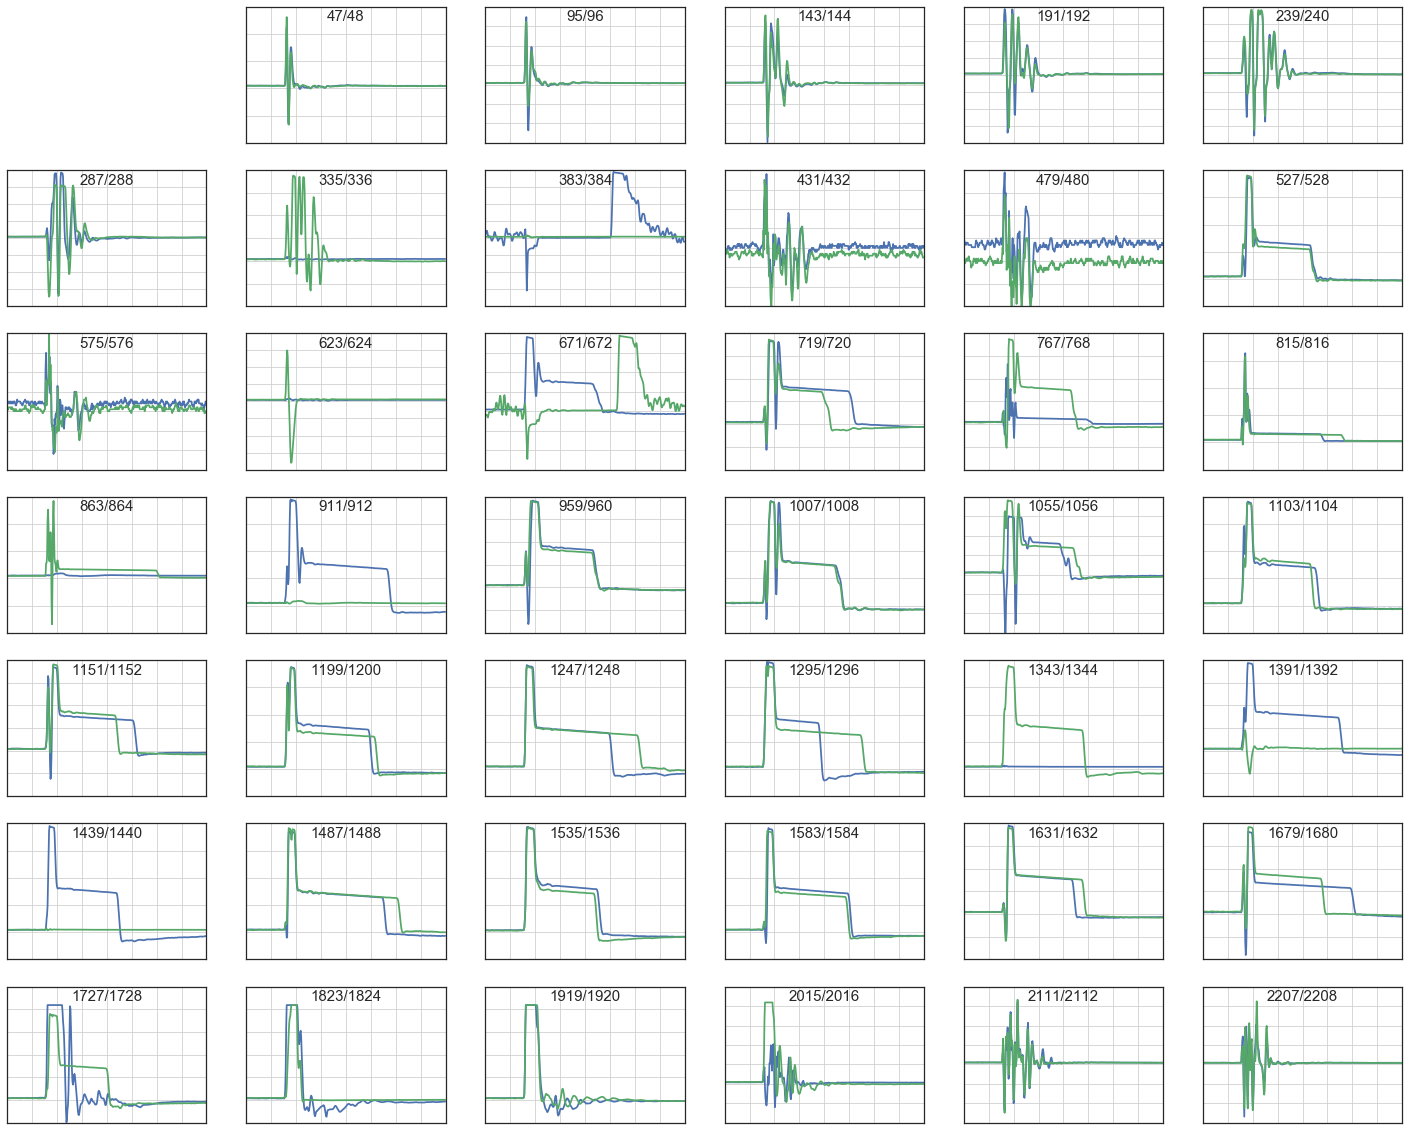

In [21]:
event , t_min , t_max = 8 , 4700 , 5100 # event 8 plane U
# event , t_min , t_max = 9 , 600 , 1200 # event 9 plane U

fig = plt.figure(figsize=(25,20))
title = 'around the mother-boards'
U_mb = np.concatenate([np.arange(0,1728,48),np.arange(1728,2400,96)])
U_mb_last = np.concatenate([np.arange(0+47,1728+47,48),np.arange(1728+95,2400+95,96)])

V_mb = np.concatenate([np.arange(2400,3072,96),np.arange(3072,4800,48)])
V_mb_last = np.concatenate([np.arange(2400+95,3072+95,96),np.arange(3072+47,4800+47,48)])

Y_mb = np.arange(4800,8256,96)
Y_mb_last = np.arange(4800+95,8256+95,96)

mb_set , mb_set_last = U_mb , U_mb_last
N = int(np.sqrt(len(mb_set)))+1
print N
for i in range(1,np.min([len(mb_set)-1,N*N])):
    wire , wire_last = mb_set[i] , mb_set_last[i-1]
    ax=fig.add_subplot(7,6,i+1)
    h_first=hist2array(histograms_file.Get("h_wf_evnt%d_wire%d"%(event , wire)))
    plt.plot(np.arange(t_min , t_max,1), h_first[t_min:t_max])

    h_last =hist2array(histograms_file.Get("h_wf_evnt%d_wire%d"%(event , wire_last)))
    plt.plot(np.arange(t_min , t_max,1), h_last[t_min:t_max])


    ax.legend(loc='best',fontsize=20)
    ax.set_title('%d/%d'%(wire_last,wire),y=0.86,fontsize=15)
    ax.grid('--',alpha=0.75)
    ax.xaxis.set_major_formatter( NullFormatter() )
    ax.yaxis.set_major_formatter( NullFormatter() )
